<a href="https://colab.research.google.com/github/Sushma-Kafle/Education-Career-Success/blob/main/ADS_502_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from scipy import stats

# Download dataset
file_path = kagglehub.dataset_download("adilshamim8/education-and-career-success")

# List all files in the downloaded directory
files = os.listdir(file_path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['education_career_success.csv']


In [ ]:
# Select the first CSV file (assuming it exists)
csv_file = [f for f in files if f.endswith(".csv")][0]  # Get the first CSV file

# Load our file the dataset
data = pd.read_csv(os.path.join(file_path, csv_file))

# Print the first few rows of our dataset
print("First 5 rows of the dataset:")

#LS: I changed the print statement with display()
display(data.head())

First 5 rows of the dataset:


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [ ]:
# Count the missing values per variable in our dataset
missing_values = data.isnull().sum()

print('Missing Values Per Column')
print(missing_values)

Missing Values Per Column
Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64


Our dataset does not contain any missing Values. So we dont need to run additional code to replace null values.

In [ ]:
#lets check if there any duplicates in dataset
data.duplicated().sum()

np.int64(0)

No duplicate record exists in datase.


Now lets check if there us any outliers exists.
We will consider age and starting_salary as outliers

In [ ]:
# lets create temporary fields called Starting_Salary_z

data['Starting_Salary_z'] = stats.zscore(data['Starting_Salary'])


## identify outliers whose salary condition meet as 'Starting_Salary_z > 3 | Starting_Salary_z < ‐3'

data_outliers = data.query('Starting_Salary_z > 3 | Starting_Salary_z < -3') ## identify outliers using temp field Starting_Salary_z we just created
data_outliers_sort = data_outliers.sort_values(['Starting_Salary_z'], ascending = False)## sort the data


## look for first few data with outliers Starting_Salary and Starting_Salary_z

data_outliers_sort[['University_GPA', 'Field_of_Study', 'Internships_Completed', 'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary', 'Gender','Current_Job_Level','Work_Life_Balance','Entrepreneurship','Starting_Salary_z']].head(n=15)


,University_GPA,Field_of_Study,Internships_Completed,Soft_Skills_Score,Networking_Score,Starting_Salary,Gender,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Starting_Salary_z
1809,3.01,Arts,0,3,8,101000.0,Other,Entry,8,No,3.479934
4538,3.93,Law,1,3,4,100600.0,Male,Entry,8,No,3.452336
3830,2.82,Arts,2,5,3,98900.0,Male,Entry,2,Yes,3.335042
3503,2.70,Engineering,4,10,2,98200.0,Male,Senior,5,No,3.286745
16,3.78,Law,3,2,5,97500.0,Female,Mid,9,No,3.238447
1340,3.07,Law,3,2,9,96900.0,Female,Entry,2,No,3.197049
128,3.60,Arts,0,1,6,96700.0,Female,Entry,5,Yes,3.183250
3434,2.87,Law,4,3,5,94400.0,Male,Mid,5,No,3.024558


###Michelle Wang

In [ ]:
print(data.nunique())

Student_ID               5000
Age                        12
Gender                      3
High_School_GPA           201
SAT_Score                 700
University_Ranking        993
University_GPA            201
Field_of_Study              7
Internships_Completed       5
Projects_Completed         10
Certifications              6
Soft_Skills_Score          10
Networking_Score           10
Job_Offers                  6
Starting_Salary           623
Career_Satisfaction        10
Years_to_Promotion          5
Current_Job_Level           4
Work_Life_Balance          10
Entrepreneurship            2
Starting_Salary_z         623
dtype: int64


To detect skewness and identify outliers  we plot the distribution of numerical variables to compare distribution accross groups.

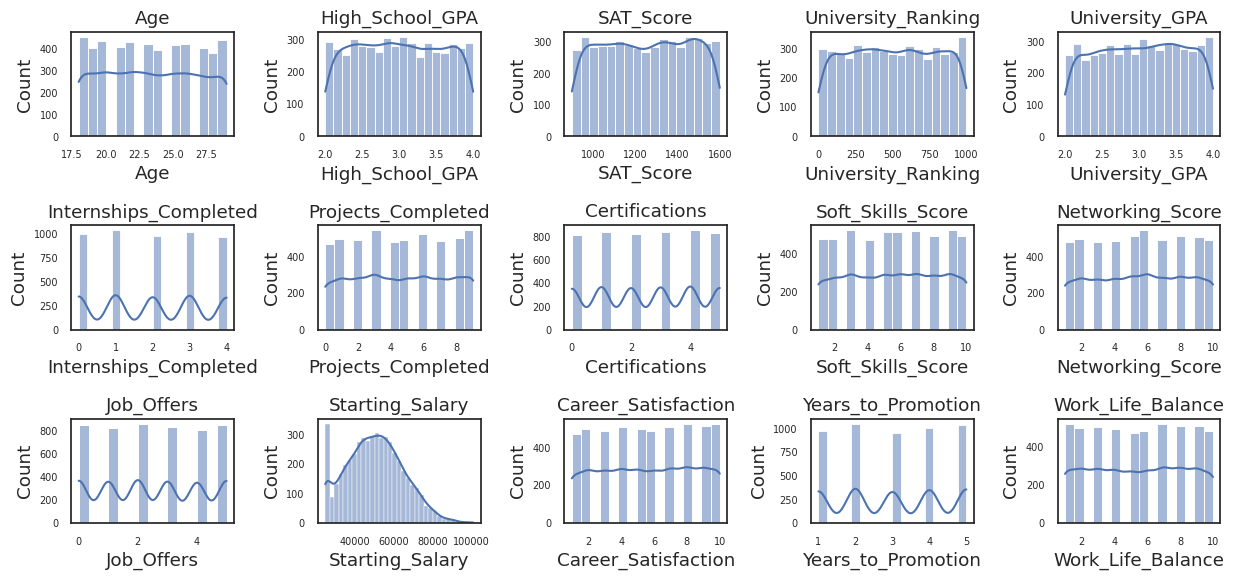

In [ ]:
import math
# Select numeric variables (limit to first 15 if more)
num_cols = data.select_dtypes(include=['int64', 'float64']).columns[:15]

# Set number of subplot rows and columns (e.g., 3 rows x 5 columns)
n_cols = 5
n_rows = math.ceil(len(num_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot the distribution for each variable
for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(labelsize=7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

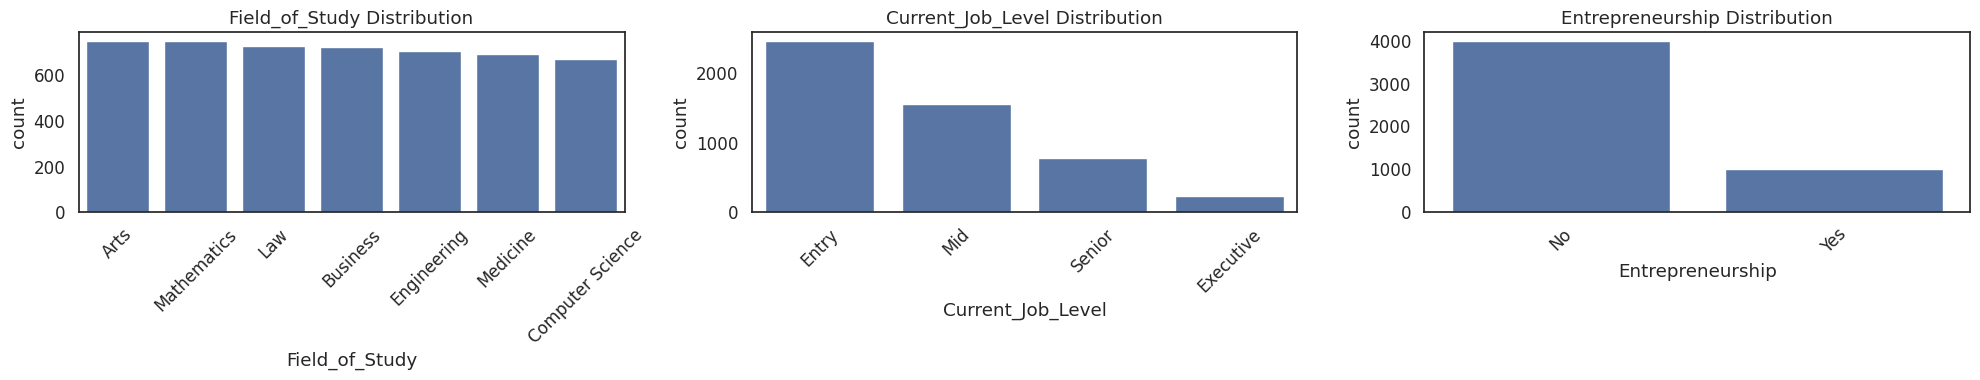

In [ ]:
categorical_cols = ['Field_of_Study', 'Current_Job_Level', 'Entrepreneurship']

# subplot in 1 row
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 4))

# plot categorical distribution
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

# adjust layout
plt.tight_layout()
plt.show()

In [ ]:
display(data.describe())

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance,Starting_Salary_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400,-6.252776e-17
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427,1.000100e+00
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000,-1.763792e+00
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000,-7.150470e-01
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000,-1.818331e-02
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000,6.855800e-01
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000,3.479934e+00


In [ ]:
# Select numeric columns
numeric_data = data.select_dtypes(include='number')

# Get base stats
summary = numeric_data.describe()

# Add median and mode
summary.loc['median'] = numeric_data.median()
summary.loc['mode'] = numeric_data.mode().iloc[0]

# Reorder rows for clarity
summary = summary.loc[['count', 'mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']]

# Final table: stats as index, features as columns
display(summary)

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance,Starting_Salary_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400,-6.252776e-17
median,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000,-1.818331e-02
mode,18.000000,3.720000,1319.000000,816.000000,3.220000,1.000000,3.000000,4.000000,3.000000,6.000000,2.000000,25000.000000,10.000000,2.000000,1.000000,-1.763792e+00
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427,1.000100e+00
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000,-1.763792e+00
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000,-7.150470e-01
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000,-1.818331e-02
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000,6.855800e-01
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000,3.479934e+00


### Luigi Salemi

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

nbins = int(np.sqrt(len(data)))

# Histogram for Starting_Salary
fig2 = px.histogram(data, x="Starting_Salary",
                   title="Distribution of Starting Salary",
                   color_discrete_sequence=['#2D72D2'],
                   opacity=0.9,nbins=nbins)
fig2.update_traces(marker_line_color='black', marker_line_width=2)
fig2.update_layout(font_family="Arial", width=700, height=400)

# Histogram for Career_Satisfaction
fig1 = px.histogram(data, x="Career_Satisfaction",
                   title="Distribution of Career Satisfaction",
                   color_discrete_sequence=['#2D72D2'],
                   opacity=0.9)
fig1.update_traces(marker_line_color='black', marker_line_width=2)
fig1.update_layout(font_family="Arial", width=700, height=400)

fig2.show()
fig1.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Create a new column for plotting purposes
data['Entrepreneurship_LS'] = data['Entrepreneurship']
if data['Entrepreneurship_LS'].dtype != 'object':
    data['Entrepreneurship_LS'] = data['Entrepreneurship_LS'].map({1: 'Yes', 0: 'No'})

# Drop any missing values in required columns
filtered_data = data[['Field_of_Study', 'Entrepreneurship_LS']].dropna()


agg_data = filtered_data.groupby(['Field_of_Study', 'Entrepreneurship_LS']).size().reset_index(name='Count')


color_map = {
    'Yes': '#2D72D2',
    'No': '#CD4246'
}

# Create grouped bar chart
fig = px.bar(
    agg_data,
    x='Field_of_Study',
    y='Count',
    color='Entrepreneurship_LS',
    barmode='group',
    color_discrete_map=color_map,
    title="Entrepreneurship Distribution by Field of Study"
)

# Formatting
fig.update_traces(marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    xaxis_title="Field of Study",
    yaxis_title="Number of Participants",
    legend_title="Entrepreneurship Status",
    font=dict(family="Arial", size=14),
    title_font=dict(size=16),
    xaxis_tickangle=45
)

fig.show()
# drop Entrepreneurship_LS
data = data.drop(columns=['Entrepreneurship_LS'])


In [ ]:
import plotly.express as px
import pandas as pd

# Convert to numeric
data['Starting_Salary'] = pd.to_numeric(data['Starting_Salary'], errors='coerce')
data['Career_Satisfaction'] = pd.to_numeric(data['Career_Satisfaction'], errors='coerce')

# Aggregate using median salary, grouping by Entrepreneurship
agg_data = data.groupby(['Career_Satisfaction', 'Entrepreneurship'], as_index=False)['Starting_Salary'].median()

# Define custom colors
custom_colors = ['#2D72D2', '#CD4246']

# Plot using Plotly
fig = px.bar(
    agg_data,
    x='Career_Satisfaction',
    y='Starting_Salary',
    color='Entrepreneurship',
    barmode='group',
    color_discrete_sequence=custom_colors,
    title="Median Starting Salary vs Career Satisfaction by Entrepreneurship Status"
)


fig.update_traces(marker_line_color='black', marker_line_width=1.5)

# Customize layout
fig.update_layout(
    xaxis_title="Career Satisfaction (1-10)",
    yaxis_title="Median Starting Salary",
    legend_title="Entrepreneurship Status",
    font=dict(family="Arial", size=14),
    title_font=dict(size=16)
)

fig.show()


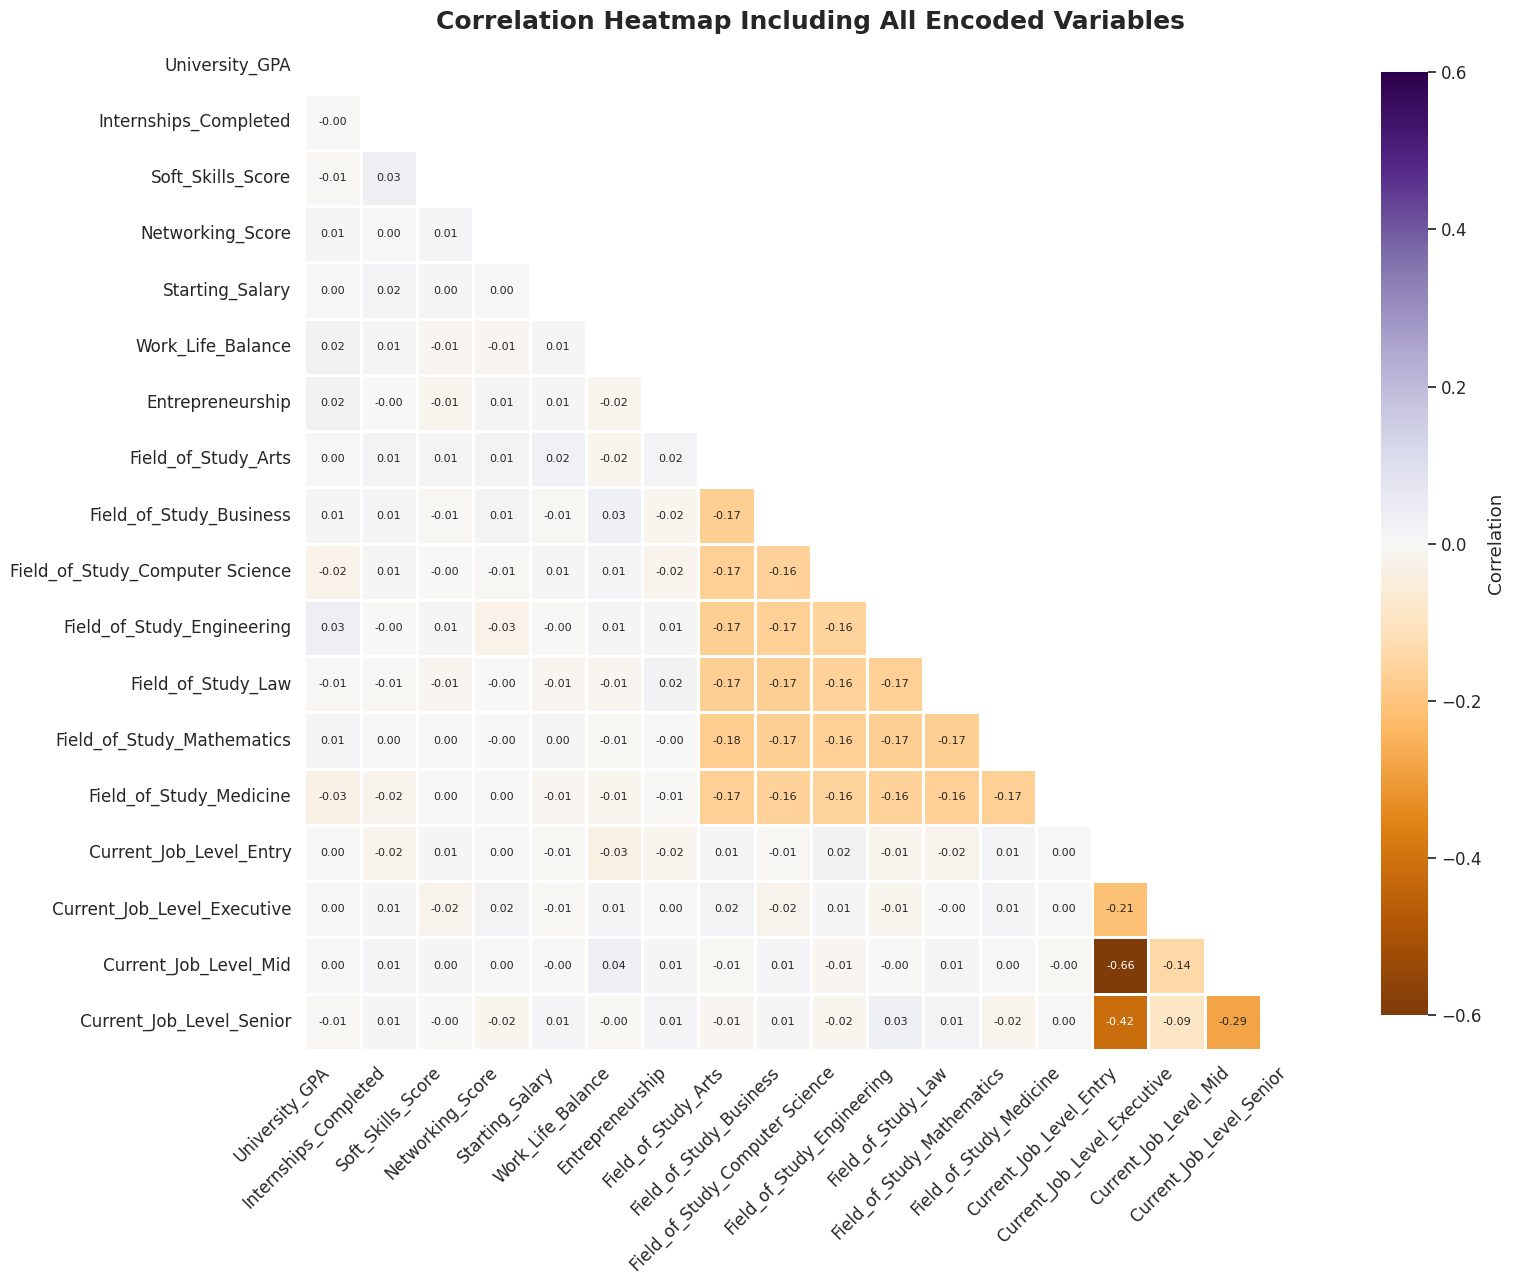

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# encoding variables in a new df to explore correlation
data_corr = data[[
    'University_GPA', 'Field_of_Study', 'Internships_Completed',
    'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary',
    'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'
]].copy()

data_corr = pd.get_dummies(
    data_corr,
    columns=['Field_of_Study', 'Current_Job_Level'],
    drop_first=False
)

data_corr['Entrepreneurship'] = data_corr['Entrepreneurship'].map({'Yes': 1, 'No': 0})
data_corr = data_corr.loc[:, data_corr.std() > 0]

corr = data_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(16, 14))

sns.heatmap(
    corr,
    mask=mask,
    cmap="PuOr",
    vmin=-0.6,
    vmax=0.6,
    center=0,
    square=True,
    linewidths=0.75,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

plt.title("Correlation Heatmap Including All Encoded Variables", fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Michael** Ha

In [ ]:
# Data types
print("\nData types:")
print(data.dtypes)

# Target variable distribution
print("\nTarget variable distribution:")
print(data['Entrepreneurship'].value_counts())
print(data['Entrepreneurship'].value_counts(normalize=True))


Data types:
Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship          object
Starting_Salary_z        float64
dtype: object

Target variable distribution:
Entrepreneurship
No     3992
Yes    1008
Name: count, dtype: int64
Entrepreneurship
No     0.7984
Yes    0.2016
Name: proportion, dtype: float64


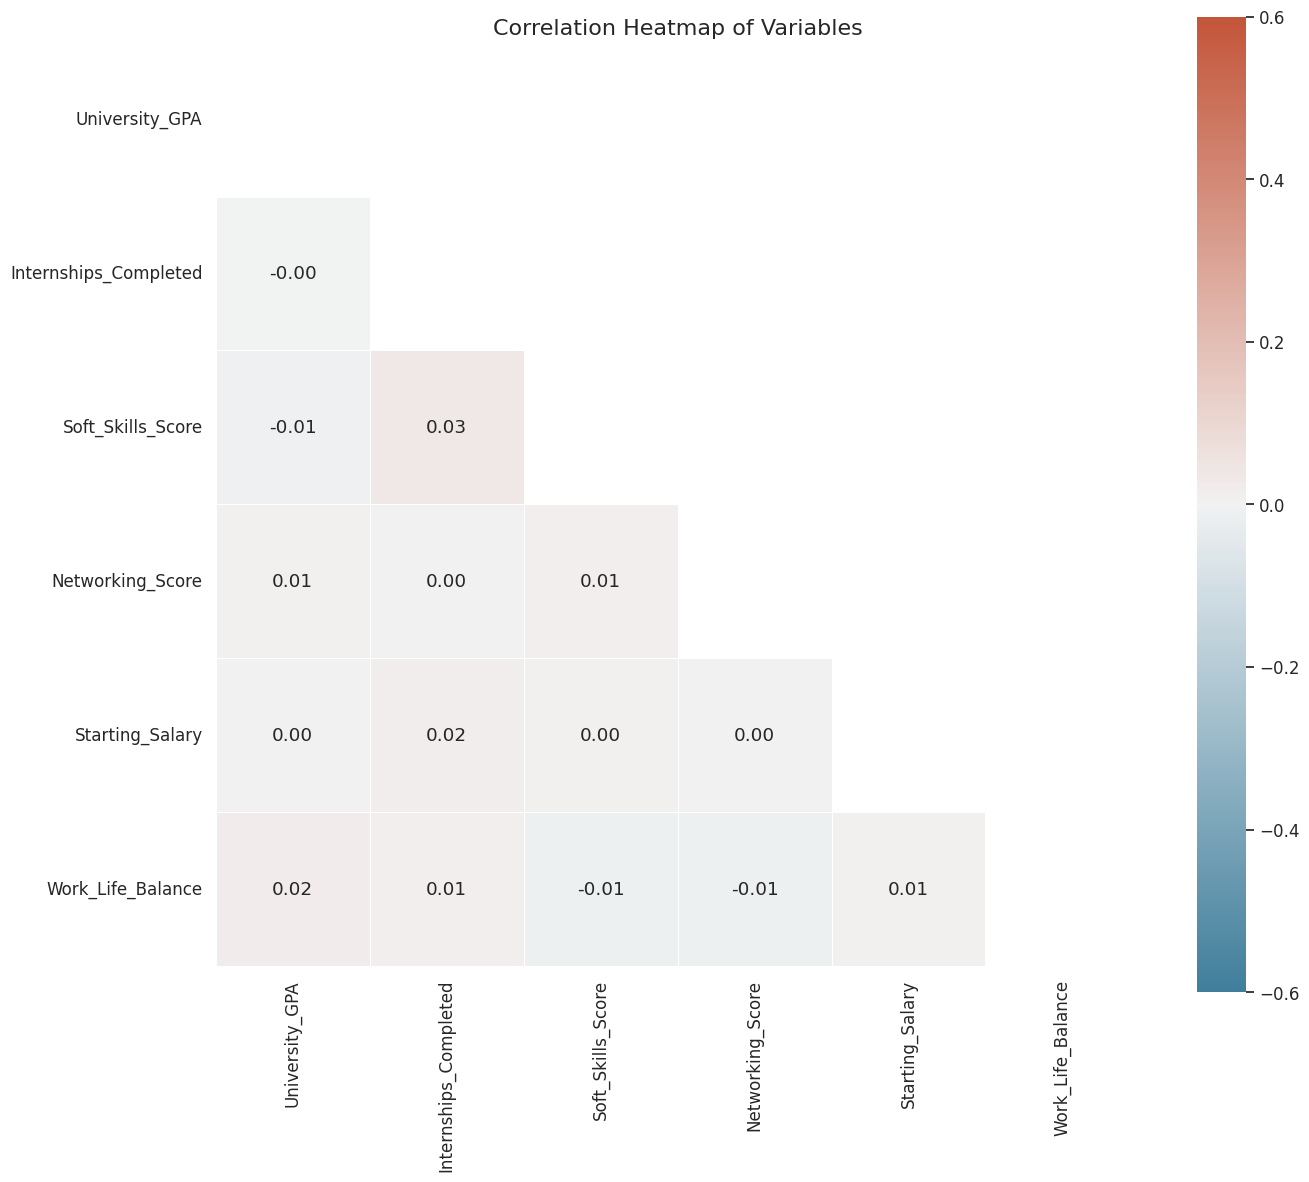

In [ ]:
# Convert categorical variables to numeric for correlation analysis
# We'll create dummy variables and then include only original numeric features plus dummy variables
data_encoded = pd.get_dummies(data[['University_GPA', 'Field_of_Study', 'Internships_Completed', 'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary', 'Current_Job_Level','Work_Life_Balance']]
, columns=['Field_of_Study', 'Current_Job_Level'], drop_first=False)

# Correlation analysis
# Select only numeric columns
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data_encoded[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap,
           vmax=.6, vmin=-.6, center=0, annot=True, fmt='.2f',
           square=True, linewidths=.5)
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

We did some data preprocessing and EDA. Next, we apply feature engineering in order to prepare for modeling

New Test Split (Includes Target & Predictors and has been standardized) - Michael

In [ ]:
import statsmodels.tools.tools as stattools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
#Declare features and target variables
X = data[['University_GPA', 'Field_of_Study', 'Internships_Completed', 'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary', 'Current_Job_Level','Work_Life_Balance']]
y = data['Entrepreneurship'].map({'Yes': 1, 'No': 0})
#y = data['Entrepreneurship']

# Convert to dummy variables
dummies = pd.get_dummies(X[['Field_of_Study','Current_Job_Level']], prefix=['Field_of_Study','Current_Job_Level'],drop_first=True)
X = pd.concat([X.drop(['Field_of_Study','Current_Job_Level'], axis=1), dummies], axis=1)


# Standardize numerical features (except for dummy variables)
numerical_features = ['University_GPA', 'Internships_Completed', 'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary','Work_Life_Balance']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=7)

# Print class distribution before SMOTE
print("Before SMOTE:\n", y_train.value_counts())

# Apply SMOTE only to training data
smote = SMOTE(random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Before SMOTE:
 Entrepreneurship
0    2994
1     756
Name: count, dtype: int64
After SMOTE:
 Entrepreneurship
1    2994
0    2994
Name: count, dtype: int64


In [ ]:
print(y_train.head(5))

3179    1
3830    1
3884    0
1488    0
4091    0
Name: Entrepreneurship, dtype: int64


In [ ]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((3750, 15), (1250, 15))

In [ ]:
# check data types in X_train
X_train.dtypes

,0
University_GPA,float64
Internships_Completed,float64
Soft_Skills_Score,float64
Networking_Score,float64
Starting_Salary,float64
Work_Life_Balance,float64
Field_of_Study_Business,bool
Field_of_Study_Computer Science,bool
Field_of_Study_Engineering,bool
Field_of_Study_Law,bool


In [ ]:
# check missing values in X_train,X_test
X_train.isnull().sum(), X_test.isnull().sum()

(University_GPA                     0
 Internships_Completed              0
 Soft_Skills_Score                  0
 Networking_Score                   0
 Starting_Salary                    0
 Work_Life_Balance                  0
 Field_of_Study_Business            0
 Field_of_Study_Computer Science    0
 Field_of_Study_Engineering         0
 Field_of_Study_Law                 0
 Field_of_Study_Mathematics         0
 Field_of_Study_Medicine            0
 Current_Job_Level_Executive        0
 Current_Job_Level_Mid              0
 Current_Job_Level_Senior           0
 dtype: int64,
 University_GPA                     0
 Internships_Completed              0
 Soft_Skills_Score                  0
 Networking_Score                   0
 Starting_Salary                    0
 Work_Life_Balance                  0
 Field_of_Study_Business            0
 Field_of_Study_Computer Science    0
 Field_of_Study_Engineering         0
 Field_of_Study_Law                 0
 Field_of_Study_Mathematics        

# **Michelle** - CART Decision Tree

In order to get a better performance tree, we did feature importancy.
We combined Networking_Score and Soft_Skills_Score by using simple average and
created new feature Social_Score for CART model (only)

In [ ]:
#checking X_train
display(X_train.head())

,University_GPA,Internships_Completed,Soft_Skills_Score,Networking_Score,Starting_Salary,Work_Life_Balance,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Engineering,Field_of_Study_Law,Field_of_Study_Mathematics,Field_of_Study_Medicine,Current_Job_Level_Executive,Current_Job_Level_Mid,Current_Job_Level_Senior
3179,1.597202,1.433017,-0.191520,1.565724,0.278501,-0.167318,False,False,False,False,False,True,False,True,False
3830,-0.347277,0.012641,-0.191520,-0.890589,3.335042,-1.207850,False,False,False,False,False,False,False,False,False
3884,0.104120,0.722829,-0.893059,-0.539687,-1.053129,1.220059,False,False,False,False,False,False,False,False,False
1488,-0.868120,-1.407735,0.159249,1.214822,-1.432610,-0.514162,False,False,False,True,False,False,False,False,False
4091,0.850661,-0.697547,-1.594599,-0.539687,-0.894438,-1.554694,False,False,False,False,False,False,False,True,False


For Cart model, we create X_cart and y_cart for Decision Tree modeling purpose.  
*   Step1, convert dummy variables - Field_of_Study' and 'Current_Job_Level.
*   Step2, replace the two categorical columns with dummies (step1).
*   Step3, train/test split.
*   Step4, apply SMOTE to target variable - rebalance the X_cart_train.

In [ ]:
# combined columns
data['Social_Score'] = (data['Networking_Score'] + data['Soft_Skills_Score']) / 2

# Preview Social_Score
print(data[['Social_Score']].head())

   Social_Score
0           8.5
1           4.5
2           5.0
3           8.0
4           9.5


In [ ]:
X_cart = data[['University_GPA', 'Field_of_Study', 'Internships_Completed',
               'Social_Score', 'Starting_Salary', 'Current_Job_Level','Work_Life_Balance']]
y_cart = data['Entrepreneurship'].map({'Yes': 1, 'No': 0})

# Convert to dummy variables
dummies = pd.get_dummies(X_cart[['Field_of_Study','Current_Job_Level']],
                         prefix=['Field_of_Study','Current_Job_Level'],
                         drop_first=True)
# Replace categorical columns with dummies
X_cart = pd.concat([X_cart.drop(['Field_of_Study', 'Current_Job_Level'], axis=1), dummies], axis=1)

# Split the data into training and testing sets (75%/25%)
X_cart_train, X_cart_test, y_cart_train, y_cart_test = train_test_split(X_cart,
                                                                        y_cart, test_size=0.25, stratify = y_cart, random_state=7)

# Print class distribution before SMOTE
print("Before SMOTE:\n", y_cart_train.value_counts())

# Apply SMOTE only to training data
smote = SMOTE(random_state=7)
X_cart_train_resampled, y_cart_train_resampled = smote.fit_resample(X_cart_train, y_cart_train)

# Print class distribution after SMOTE
print("After SMOTE:\n", pd.Series(y_cart_train_resampled).value_counts())

Before SMOTE:
 Entrepreneurship
0    2994
1     756
Name: count, dtype: int64
After SMOTE:
 Entrepreneurship
1    2994
0    2994
Name: count, dtype: int64


In [ ]:
#double checking new feature Social_Score is inclued
display(X_cart.head())

,University_GPA,Internships_Completed,Social_Score,Starting_Salary,Work_Life_Balance,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Engineering,Field_of_Study_Law,Field_of_Study_Mathematics,Field_of_Study_Medicine,Current_Job_Level_Executive,Current_Job_Level_Mid,Current_Job_Level_Senior
0,3.96,3,8.5,27200.0,7,False,False,False,False,False,False,False,False,False
1,3.63,4,4.5,25000.0,7,False,False,False,True,False,False,False,True,False
2,2.63,4,5.0,42400.0,7,False,False,False,False,False,True,False,False,False
3,2.81,3,8.0,57400.0,5,False,True,False,False,False,False,False,True,False
4,2.48,4,9.5,47600.0,2,False,False,True,False,False,False,False,False,False


In [ ]:
display(y_cart_train.head())

,Entrepreneurship
3179,1
3830,1
3884,0
1488,0
4091,0


Now, we train the CART model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from statsmodels.tools import tools as stattools
import matplotlib.pyplot as plt

# Train CART model
cart_model_clean02 = DecisionTreeClassifier(criterion='gini', max_depth=6, class_weight='balanced', random_state=42)
cart_model_clean02.fit(X_cart_train_resampled, y_cart_train_resampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [ ]:
cart_model_clean02.feature_importances_

array([0.0471678 , 0.06900799, 0.11280741, 0.02358164, 0.        ,
       0.02297265, 0.        , 0.02333107, 0.08450612, 0.06571461,
       0.04449102, 0.10007268, 0.19682016, 0.20952686])

In [ ]:
# Check tree depth and leaf count
print("Tree Depth:", cart_model_clean02.get_depth())
print("Number of Leaves:", cart_model_clean02.get_n_leaves())
print("Decision Nodes:", cart_model_clean02.tree_.node_count - cart_model_clean02.get_n_leaves())

Tree Depth: 6
Number of Leaves: 33
Decision Nodes: 32


Next, plot the tree.

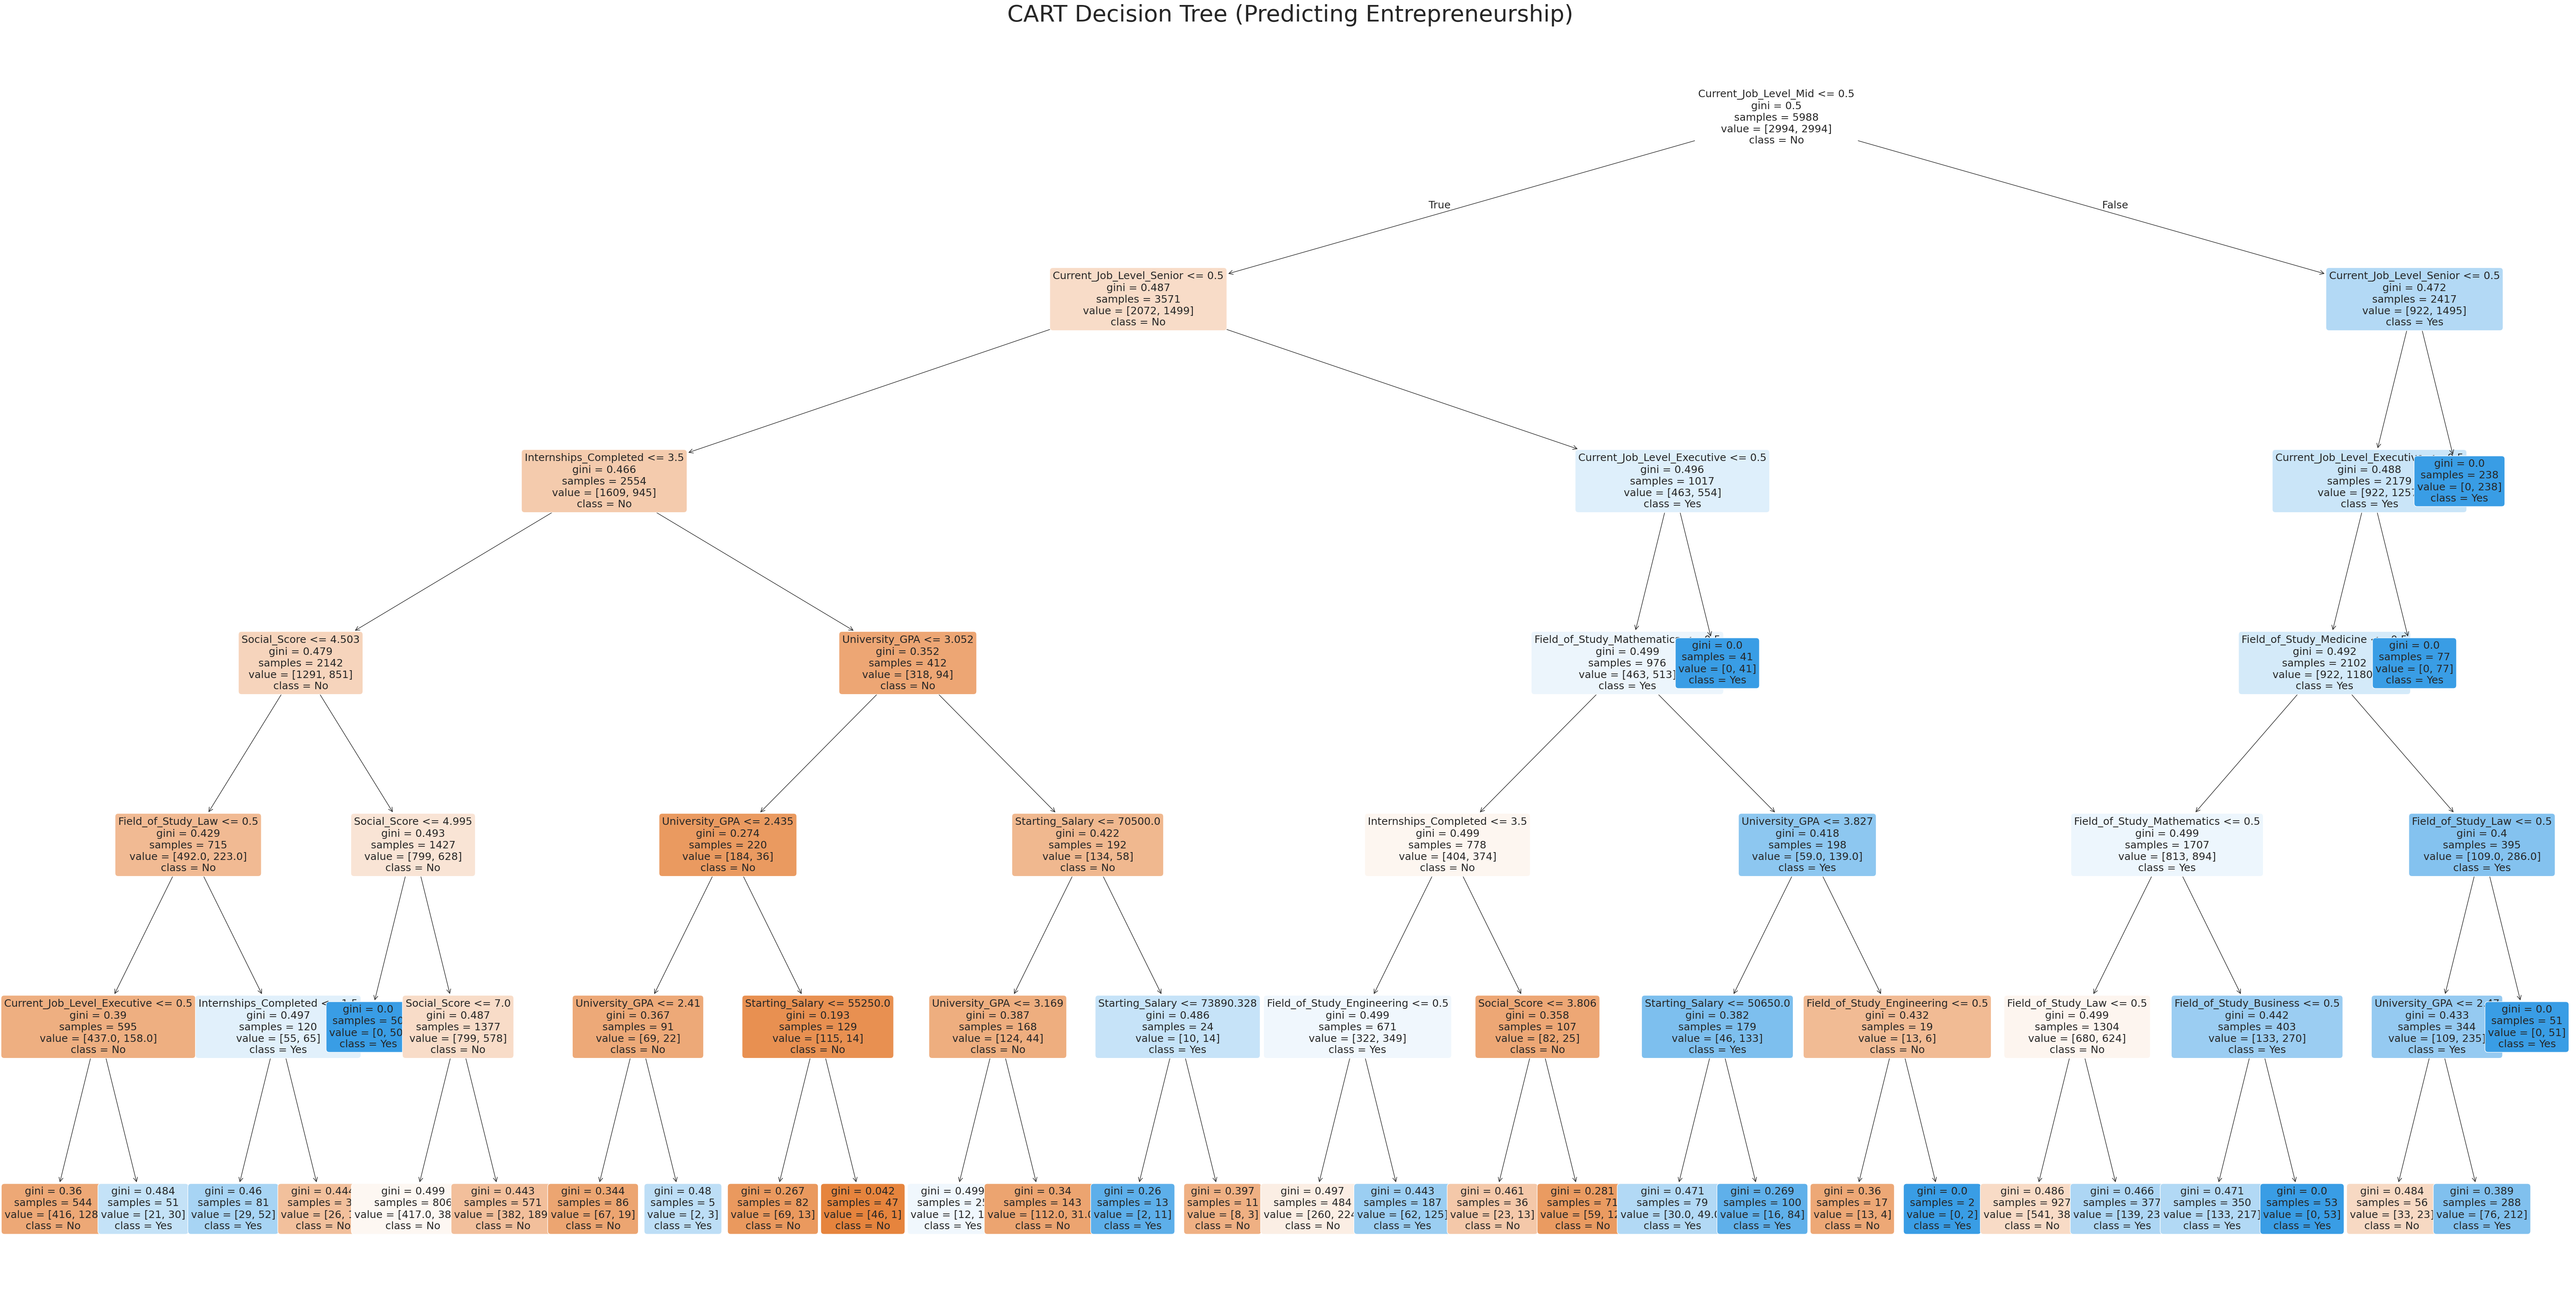

In [ ]:
# Get the feature names from the resampled training set
X_names = X_cart_train_resampled.columns

plt.figure(figsize=(80, 40))
plot_tree(
    cart_model_clean02,
    feature_names=X_names,  # feature column names
    class_names=["No", "Yes"],     # label for binary target
    filled=True,                   # color nodes by class
    rounded=True,                   # rounded node boxes
    fontsize=18  #increase fontsize for readibility
)
plt.title("CART Decision Tree (Predicting Entrepreneurship)", fontsize=40)
plt.savefig("cart_tree_plot.png", dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

Last, we evaluate the model.

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Evaluate the model
y_pred_clean = cart_model_clean02.predict(X_cart_test)
y_prob_clean = cart_model_clean02.predict_proba(X_cart_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_cart_test, y_pred_clean).ravel()

# Calculate metrics
accuracy = accuracy_score(y_cart_test, y_pred_clean)
error_rate = 1 - accuracy
precision = precision_score(y_cart_test, y_pred_clean, zero_division=0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_cart_test, y_pred_clean)
roc_auc = roc_auc_score(y_cart_test, y_prob_clean)
recall = recall_score(y_cart_test, y_pred_clean, zero_division=0)
#Build evaluation table
eval_table = pd.DataFrame({
    'CART': [
        round(accuracy, 3),
        round(error_rate, 3),
        round(precision, 3),
        round(specificity, 3),
        round(recall, 3),
        round(f1, 3),
        round(roc_auc, 3)]
}, index=['Accuracy', 'Error Rate', 'Precision', 'Specificity', 'Recall', 'F1', 'ROC AUC'])

print(eval_table)

              CART
Accuracy     0.694
Error Rate   0.306
Precision    0.214
Specificity  0.820
Recall       0.194
F1           0.204
ROC AUC      0.508


In [ ]:
#Create CART Confusion Matrix
cart_Clist = pd.crosstab(y_cart_test, y_pred_clean, rownames=['Actual'], colnames=['Predicted'])
print("\nConfusion Matrix:")
cart_Clist ['Total'] = cart_Clist .sum(axis =1);cart_Clist .loc['Total'] = cart_Clist .sum();cart_Clist


Confusion Matrix:


Predicted,0,1,Total
Actual,,,
0,818,180,998
1,203,49,252
Total,1021,229,1250


#XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=7)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=7, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Confusion metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, zero_division=0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred, zero_division=0)
# Evaluation table
eval_table = pd.DataFrame({
    'XGBoost': [
        round(accuracy, 3),
        round(error_rate, 3),
        round(precision, 3),
        round(specificity, 3),
        round(recall, 3),
        round(f1, 3),
        round(roc_auc, 3)
    ]
}, index=['Accuracy', 'Error Rate', 'Precision', 'Specificity','Recall', 'F1', 'ROC AUC'])

print(eval_table)

             XGBoost
Accuracy       0.793
Error Rate     0.207
Precision      0.231
Specificity    0.990
Recall         0.012
F1             0.023
ROC AUC        0.472


# **Sushma Kafle-**-Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Create the random forest and train the model on training data
rfc_model = RandomForestClassifier(n_estimators = 200,criterion="gini",random_state=7).fit(X_train_resampled, y_train_resampled)


In [ ]:
# Evaluate the model
y_pred = rfc_model.predict(X_test)
y_prob = rfc_model.predict_proba(X_test)[:, 1]


In [ ]:
# Get tn, fp, fn, tp from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
#Create Confusion Matrix
rf_cmlist = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("\nConfusion Matrix:")
rf_cmlist ['Total'] = rf_cmlist .sum(axis =1);rf_cmlist .loc['Total'] = rf_cmlist .sum();rf_cmlist


Confusion Matrix:


Predicted,0,1,Total
Actual,,,
0,966,32,998
1,244,8,252
Total,1210,40,1250


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
Precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
roc_auc = roc_auc_score(y_test, y_prob)

In [ ]:
#Build evaluation table
eval_table_rfc = pd.DataFrame({
    'Forest': [
        round(accuracy, 3),
        round(error_rate, 3),
        round(Precision, 3),
        round(recall, 3),
        round(specificity, 3),
        round(f1, 3),
        round(roc_auc, 3)]
}, index=['Accuracy', 'Error Rate', 'Precision', 'Specificity','Recall', 'F1', 'ROC AUC'])

print(eval_table_rfc)

             Forest
Accuracy      0.779
Error Rate    0.221
Precision     0.200
Specificity   0.032
Recall        0.968
F1            0.055
ROC AUC       0.495


# **Michael Ha-**-Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]

In [ ]:
#Create Confusion Matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("\nConfusion Matrix:")
conf_matrix['Total'] = conf_matrix.sum(axis =1);conf_matrix.loc['Total'] = conf_matrix.sum();conf_matrix


Confusion Matrix:


Predicted,0,1,Total
Actual,,,
0,648,350,998
1,165,87,252
Total,813,437,1250


In [ ]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
Precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
roc_auc = roc_auc_score(y_test, y_prob)

#Build evaluation table
eval_table_nbc = pd.DataFrame({
    'Naive Bayes': [
        round(accuracy, 3),
        round(error_rate, 3),
        round(Precision, 3),
        round(recall, 3),
        round(specificity, 3),
        round(f1, 3),
        round(roc_auc, 3)]
}, index=['Accuracy', 'Error Rate', 'Precision', 'Specificity', 'Recall', 'F1', 'ROC AUC'])

print(eval_table_nbc)

             Naive Bayes
Accuracy           0.588
Error Rate         0.412
Precision          0.199
Specificity        0.345
Recall             0.968
F1                 0.253
ROC AUC            0.495


In [ ]:
print(y_train_resampled.value_counts())
print(y_test.value_counts())

Entrepreneurship
1    2994
0    2994
Name: count, dtype: int64
Entrepreneurship
0    998
1    252
Name: count, dtype: int64


# **Luigi Salemi-**-Logistic Regression

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Ensure everything is numeric
X_train_log = sm.add_constant(X_train_resampled).astype(float)
y_train_log = pd.Series(y_train_resampled).astype(float)

# Fit logistic regression on training data
logreg01 = sm.Logit(y_train_log, X_train_log).fit()
print("\n--- Logistic Regression Summary (TRAINING DATA) ---")
print(logreg01.summary2())

# Prepare test data
X_test_log = sm.add_constant(X_test).astype(float)
y_test_log = pd.Series(y_test).astype(float)

# Fit logistic regression -- Following book code:
logreg01_test = sm.Logit(y_test_log, X_test_log).fit()
print("\n--- Logistic Regression Summary (TEST DATA) ---")
print(logreg01_test.summary2())


# Using latex to generate the equation
def logistic_equation_latex(coefficients):
    equation = r"\log\left(\frac{p}{1 - p}\right) = "
    terms = [f"{coef:.3f}" if i == 'const' else f"{coef:.3f} \\cdot {i}" for i, coef in coefficients.items()]
    return equation + " + ".join(terms)

def logistic_equation_latex_clean(coefficients, chunk_size=3):
    terms = []
    for var, coef in coefficients.items():
        if var == 'const':
            terms.append(f"{coef:.3f}")
        else:
            sign = '+' if coef >= 0 else '-'  # handle negative signs
            coef_abs = abs(coef)
            terms.append(f"{sign} {coef_abs:.3f} \\cdot \\text{{{var}}}")


    lines = [terms[i:i+chunk_size] for i in range(0, len(terms), chunk_size)]
    latex_lines = ["    " + " ".join(line) + r"\\" for line in lines]

    latex_eq = (
        r"\begin{align*}" + "\n"
        r"\log\left(\frac{p}{1 - p}\right) = " + "\n" +
        "\n".join(latex_lines) +
        r"\end{align*}"
    )
    return latex_eq

# Generate LaTeX equation from training model
coefficients = logreg01.params
latex_eq = logistic_equation_latex_clean(coefficients)

print("\n--- Logistic Regression Equation (LaTeX, Multiline) ---")
print(latex_eq)

Optimization terminated successfully.
         Current function value: 0.645028
         Iterations 5

--- Logistic Regression Summary (TRAINING DATA) ---
                                 Results: Logit
Model:                    Logit                Method:               MLE        
Dependent Variable:       Entrepreneurship     Pseudo R-squared:     0.069      
Date:                     2025-04-15 04:52     AIC:                  7756.8613  
No. Observations:         5988                 BIC:                  7864.0215  
Df Model:                 15                   Log-Likelihood:       -3862.4    
Df Residuals:             5972                 LL-Null:              -4150.6    
Converged:                1.0000               LLR p-value:          3.8888e-113
No. Iterations:           5.0000               Scale:                1.0000     
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import plotly.graph_objects as go


y_pred_proba = logreg01.predict(X_test_log)

y_pred = (y_pred_proba >= 0.5).astype(int)


TN, FP, FN, TP = confusion_matrix(y_test_log, y_pred).ravel()

accuracy = accuracy_score(y_test_log, y_pred)
error_rate = 1 - accuracy
sensitivity = recall_score(y_test_log, y_pred)
specificity = TN / (TN + FP)
precision = precision_score(y_test_log, y_pred)
f1 = f1_score(y_test_log, y_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Error Rate:  {error_rate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"F1 Score:    {f1:.4f}")


--- Model Evaluation on Test Data ---
Accuracy:    0.5472
Error Rate:  0.4528
Sensitivity: 0.4167
Specificity: 0.5802
Precision:   0.2004
F1 Score:    0.2706


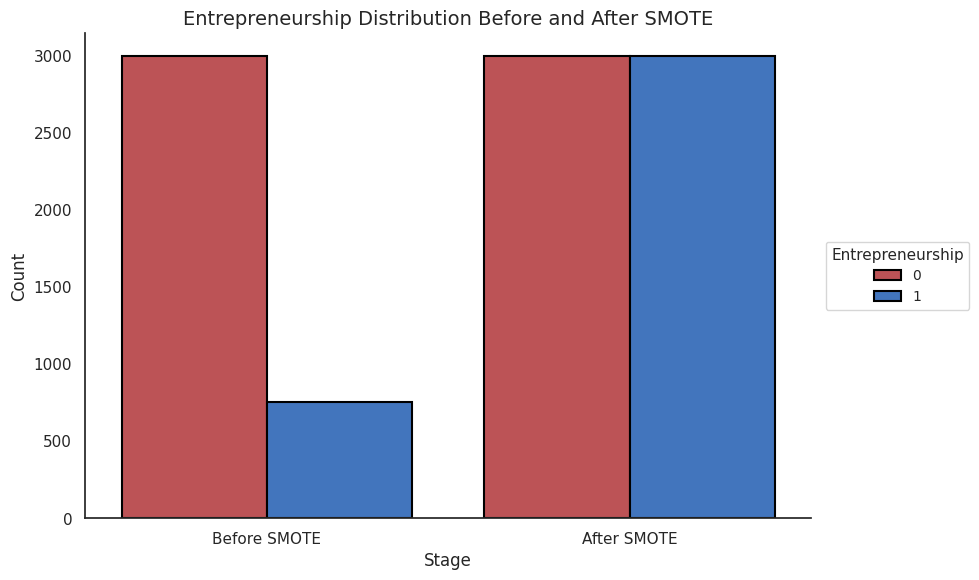

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({
    'Stage': ['Before SMOTE', 'Before SMOTE', 'After SMOTE', 'After SMOTE'],
    'Entrepreneurship': ['0', '1', '0', '1'],
    'Count': [2994, 756, 2994, 2994]
})

# Custom color palette
color_map = {'0': '#CD4246', '1': '#2D72D2'}

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df,
    x='Stage',
    y='Count',
    hue='Entrepreneurship',
    palette=color_map,
    edgecolor='black',
    linewidth=1.5
)

# Title and labels (no font override)
barplot.set_title('Entrepreneurship Distribution Before and After SMOTE', fontsize=14)
barplot.set_xlabel('Stage', fontsize=12)
barplot.set_ylabel('Count', fontsize=12)
barplot.tick_params(labelsize=11)

# Legend on the right
plt.legend(
    title='Entrepreneurship',
    title_fontsize=11,
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# Layout tweaks
sns.despine()
plt.tight_layout()
plt.show()


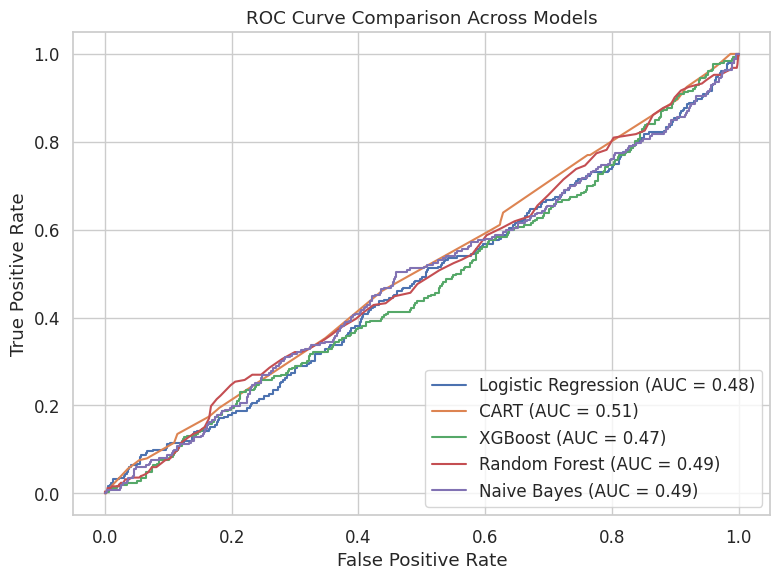

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_test_rf = y_test.copy()
y_test_nb = y_test.copy()
y_test_cart = y_test.copy()
y_test_xgb = y_test.copy()

roc_data = {}

fpr_log, tpr_log, _ = roc_curve(y_test_log, logreg01.predict(X_test_log))
roc_data["Logistic Regression"] = (fpr_log, tpr_log, auc(fpr_log, tpr_log))

fpr_cart, tpr_cart, _ = roc_curve(y_test_cart, cart_model_clean02.predict_proba(X_cart_test)[:, 1])
roc_data["CART"] = (fpr_cart, tpr_cart, auc(fpr_cart, tpr_cart))

fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, xgb_model.predict_proba(X_test)[:, 1])
roc_data["XGBoost"] = (fpr_xgb, tpr_xgb, auc(fpr_xgb, tpr_xgb))

fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, rfc_model.predict_proba(X_test)[:, 1])
roc_data["Random Forest"] = (fpr_rf, tpr_rf, auc(fpr_rf, tpr_rf))

fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, nb_model.predict_proba(X_test)[:, 1])
roc_data["Naive Bayes"] = (fpr_nb, tpr_nb, auc(fpr_nb, tpr_nb))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.1)

for model_name, (fpr, tpr, model_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {model_auc:.2f})")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
